###Title -
IMPLEMENTATION OF CLUSTERING TECHNIQUES
1. K-MEANS
2. HIERARCHICAL CLUSTERING
3. DBSCAN
4. EXPECTATION MAXIMIZATION ALGORITHM

###THEORY:
1. K-means Clustering:
Objective: Partition the data into k clusters, where each data point belongs to the cluster with the nearest mean.
How it works: Randomly initialize k cluster centroids. Assign each data point to the nearest centroid. Recalculate the centroid of each cluster. Repeat the assignment and recalculation steps until convergence or a specified number of iterations.Key Parameters: Number of clusters (k): The user must specify
the number of clusters to form. Initialization: The method used to initialize the centroids.



2. Hierarchical Clustering:
Objective: Build a hierarchy of clusters. The result is a tree-like structure called a dendrogram. How it works: Treat each data point as a single
cluster. Merge the two closest clusters at each step until only one cluster remains. The dendrogram visually represents the hierarchy of
clusters, and you can cut it at a certain height to obtain a specific number of clusters. Key Parameters: Linkage Method: Determines the
distance between clusters. Dendrogram Cut Height: Specifies the level at which to cut the dendrogram.



3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
Objective: Identify clusters based on dense regions in the data space, and it can find clusters of arbitrary shapes. How it works: Define a
neighborhood around each data point within a specified distance (eps). If a point has at least a minimum number of points (min_samples)
within its neighborhood, it's considered a core point. Expand clusters by connecting core points that are close enough to each other. Points that
are not core points or part of any cluster are considered outliers or noise. Key Parameters: Epsilon (eps): Maximum distance between two
samples for one to be considered as being in the neighborhood of the other. Min_samples: The minimum number of samples in a neighborhood
for a point to be considered as a core point.



4. EXPECTATION MAXIMIZATION ALGORITHM:
The Expectation-Maximization (EM) algorithm is defined as the combination of various unsupervised machine learning algorithms, which is
used to determine the local maximum likelihood estimates (MLE) or maximum a posteriori estimates (MAP) for unobservable variables in
statistical models. Further, it is a technique to find maximum likelihood estimation when the latent variables are present. It is also referred to as
the latent variable model.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file = pd.read_csv('/content/Gender_classification_dataset.csv')
file.head(20)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
5,1,13.0,6.8,1,1,1,1,1
6,1,15.3,6.2,1,1,1,0,1
7,0,13.0,5.2,0,0,0,0,0
8,1,11.9,5.4,1,0,1,1,0
9,1,12.1,5.4,0,0,0,0,0


In [ ]:
file.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
file.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
numeric_features = ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide','nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender']
file[numeric_features] = imputer.fit_transform(file[numeric_features])

In [ ]:
file[numeric_features] = file[numeric_features].apply(pd.to_numeric, errors='coerce')


In [ ]:
file.dropna(inplace=True)

In [ ]:
features = file[numeric_features]

In [ ]:
numeric_features = ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide','nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender']

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_features)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Adjust DBSCAN parameters
dbscan = DBSCAN(eps=1.0, min_samples=5)  # Adjust parameters accordingly
dbscan_labels = dbscan.fit_predict(scaled_features)

# Check for multiple clusters
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

if n_clusters > 1:
    silhouette_dbscan = silhouette_score(scaled_features, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
else:
    print("DBSCAN resulted in only one cluster or noise points.")


DBSCAN Silhouette Score: 0.34004545794222907


In [ ]:
silhouette_kmeans = silhouette_score(scaled_features, kmeans_labels)
silhouette_hierarchical = silhouette_score(scaled_features, hierarchical_labels)
print("Silhouette Score - K-means:", silhouette_kmeans)
print("Silhouette Score - Hierarchical:", silhouette_hierarchical)

Silhouette Score - K-means: 0.39849039077126874
Silhouette Score - Hierarchical: 0.3887326841275086


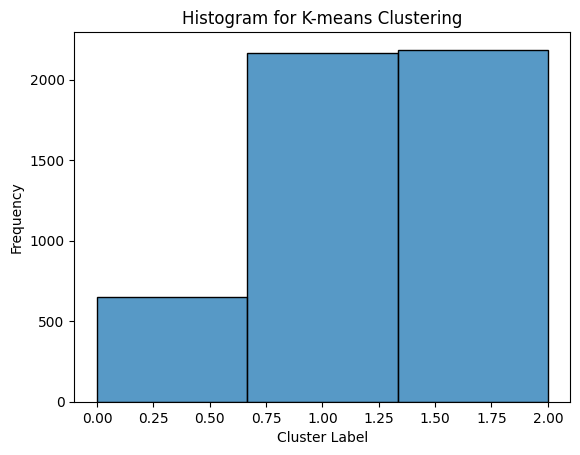

In [ ]:
sns.histplot(data=kmeans_labels, bins=len(set(kmeans_labels)), kde=False)
plt.title('Histogram for K-means Clustering')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.show()


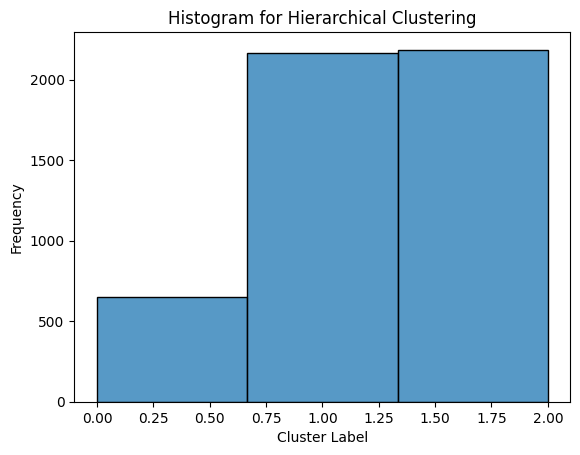

In [ ]:
sns.histplot(data=hierarchical_labels, bins=len(set(hierarchical_labels)), kde=False)
plt.title('Histogram for Hierarchical Clustering')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.show()


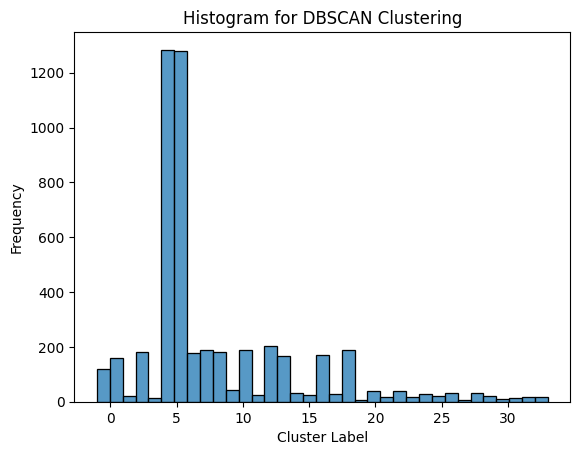

In [ ]:
sns.histplot(data=dbscan_labels, bins=len(set(dbscan_labels)), kde=False)
plt.title('Histogram for DBSCAN Clustering')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.show()

In [ ]:
n_components = 3 # Adjust the number of components/clusters based on your analysis
gmm = GaussianMixture(n_components=n_components, random_state=42)
file['em_cluster'] = gmm.fit_predict(scaled_features)


In [ ]:
silhouette_em = silhouette_score(scaled_features, file['em_cluster'])


In [ ]:
print("\nAfter Expectation-Maximization (GMM):")
print(f"Silhouette Score (EM): {silhouette_em}")
print(file[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide','nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender']])


After Expectation-Maximization (GMM):
Silhouette Score (EM): 0.3065178986514508
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0           1.0               11.8                 6.1        1.0        0.0   
1           0.0               14.0                 5.4        0.0        0.0   
2           0.0               11.8                 6.3        1.0        1.0   
3           0.0               14.4                 6.1        0.0        1.0   
4           1.0               13.5                 5.9        0.0        0.0   
...         ...                ...                 ...        ...        ...   
4996        1.0               13.6                 5.1        0.0        0.0   
4997        1.0               11.9                 5.4        0.0        0.0   
4998        1.0               12.9                 5.7        0.0        0.0   
4999        1.0               13.2                 6.2        0.0        0.0   
5000        1.0               15.4     